In [ ]:
!pip3 install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown https://drive.google.com/file/d/1mOiexScA1h8-da23mg26f-3ULKYKE9IN/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1mOiexScA1h8-da23mg26f-3ULKYKE9IN
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1mOiexScA1h8-da23mg26f-3ULKYKE9IN/view?usp=sharing
To: /content/view?usp=sharing
74.0kB [00:00, 37.4MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1mOiexScA1h8-da23mg26f-3ULKYKE9IN&export=download

Downloading...
From: https://drive.google.com/uc?id=1mOiexScA1h8-da23mg26f-3ULKYKE9IN
To: /content/archive.zip
100% 107M/107M [00:05<00:00, 19.7MB/s] 


In [ ]:
!rm -rf /content/archive

In [ ]:
!unzip archive.zip -d archive

Streaming output truncated to the last 5000 lines.
  inflating: archive/train/train/Pepper Green/Pepper Green_264.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_265.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_266.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_267.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_268.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_269.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_27.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_270.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_271.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_272.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_273.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_274.jpg  
  inflating: archive/train/train/Pepper Green/Pepper Green_275.jpg  
  inflating: archive/train/train/Pepper Green/Pepper 

# Importing all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import cv2
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Exploring the dataset

In [ ]:
fruits_dataset_path = '/content/archive'

In [ ]:
def get_files_and_subfolders(root_folder):
    files = []
    subfolders = []
    with os.scandir(root_folder) as paths:
        for path in paths:
            if path.is_file():
                files.append(path.name)
            elif path.is_dir():
                subfolders.append(path.name)
    return files, subfolders

def print_directory_tree(rootdir, padding=''):
    print('\n'+padding[:-1] + '+--' + os.path.basename(rootdir) + '/', end='')
    files, subfolders = get_files_and_subfolders(rootdir)
    extension_map = dict()
    for file in files:
        file_extension = file.split('.')[-1]
        extension_map[file_extension] = extension_map.get(file_extension, 0) + 1
    for extension, ext_count in extension_map.items():
        print('[{}==>{}]'.format(extension, ext_count), end='')
    for folder in subfolders:
        path = os.path.join(rootdir, folder)
        print_directory_tree(path, padding + '    ')

In [ ]:
print_directory_tree(fruits_dataset_path)


+--archive/[csv==>1]
   +--test/
       +--test/[jpg==>5641]
   +--train/
       +--train/
           +--Cactus fruit/[jpg==>490]
           +--Pepper Green/[jpg==>444]
           +--Avocado/[jpg==>427]
           +--Pear/[jpg==>696]
           +--Cucumber Ripe/[jpg==>392]
           +--Cantaloupe/[jpg==>492]
           +--Cherry/[jpg==>492]
           +--Tomato/[jpg==>738]
           +--Banana/[jpg==>490]
           +--Potato Red/[jpg==>450]
           +--Onion White/[jpg==>438]
           +--Grape Blue/[jpg==>984]
           +--Peach/[jpg==>492]
           +--Passion Fruit/[jpg==>490]
           +--Strawberry/[jpg==>492]
           +--Corn/[jpg==>450]
           +--Mango/[jpg==>490]
           +--Pepper Red/[jpg==>666]
           +--Clementine/[jpg==>490]
           +--Limes/[jpg==>490]
           +--Plum/[jpg==>447]
           +--Apple Granny Smith/[jpg==>492]
           +--Pomegranate/[jpg==>492]
           +--Blueberry/[jpg==>462]
           +--Papaya/[jpg==>492]
           +--Ap

In [ ]:
dataset = fruits_dataset_path + '/train/train'

### Checking all the different types of fruits

In [ ]:
fruit_categories = os.listdir(dataset)
print(fruit_categories)

['Cactus fruit', 'Pepper Green', 'Avocado', 'Pear', 'Cucumber Ripe', 'Cantaloupe', 'Cherry', 'Tomato', 'Banana', 'Potato Red', 'Onion White', 'Grape Blue', 'Peach', 'Passion Fruit', 'Strawberry', 'Corn', 'Mango', 'Pepper Red', 'Clementine', 'Limes', 'Plum', 'Apple Granny Smith', 'Pomegranate', 'Blueberry', 'Papaya', 'Apricot', 'Raspberry', 'Pineapple', 'Apple Braeburn', 'Kiwi', 'Watermelon', 'Lemon', 'Orange']


### Checking the dimensions of all the images

In [ ]:
dimensions = dict()
for fruit in fruit_categories:
    fruit_path = os.path.join(dataset, fruit)
    images_in_fruit = os.listdir(fruit_path)
    for image in images_in_fruit:
        image_path = os.path.join(fruit_path, image)
        height, width, channels = cv2.imread(image_path).shape
        dimensions['{} x {} - {}'.format(height, width, channels)] = True
dimensions.keys()

dict_keys(['100 x 100 - 3'])

We observe that all the images are of same dimension - 100 x 100 , RGB

# Data Visualisation

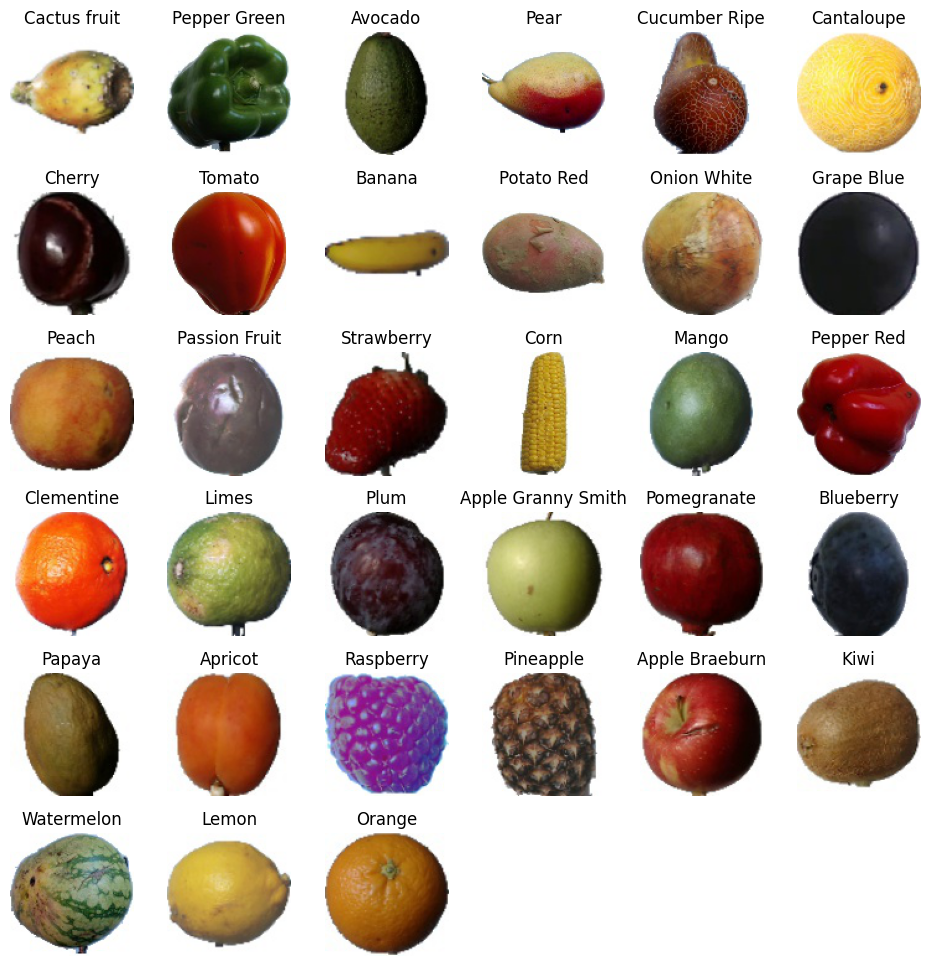

In [ ]:
num_fruit_categories = len(fruit_categories)
num_columns = 6
fig, axis = plt.subplots((num_fruit_categories // num_columns + (num_fruit_categories % num_columns > 0)), num_columns, figsize=(12, 12))
for count, fruit in enumerate(fruit_categories):
    fruit_path = os.path.join(dataset, fruit)
    first_image = os.listdir(fruit_path)[0]
    image_path = os.path.join(fruit_path, first_image)
    image = plt.imread(image_path)
    axis[count//num_columns, count % num_columns].imshow(image)
    axis[count//num_columns, count % num_columns].axis('off')
    axis[count//num_columns, count % num_columns].set_title(fruit)
cur_col = count % num_columns
while cur_col < num_columns:
    axis[count//num_columns, cur_col].axis('off')
    cur_col += 1
fig.subplots_adjust(wspace=0.1, hspace=0.3)

Text(0.5, 1.0, 'Fruit Count Bar Chart')

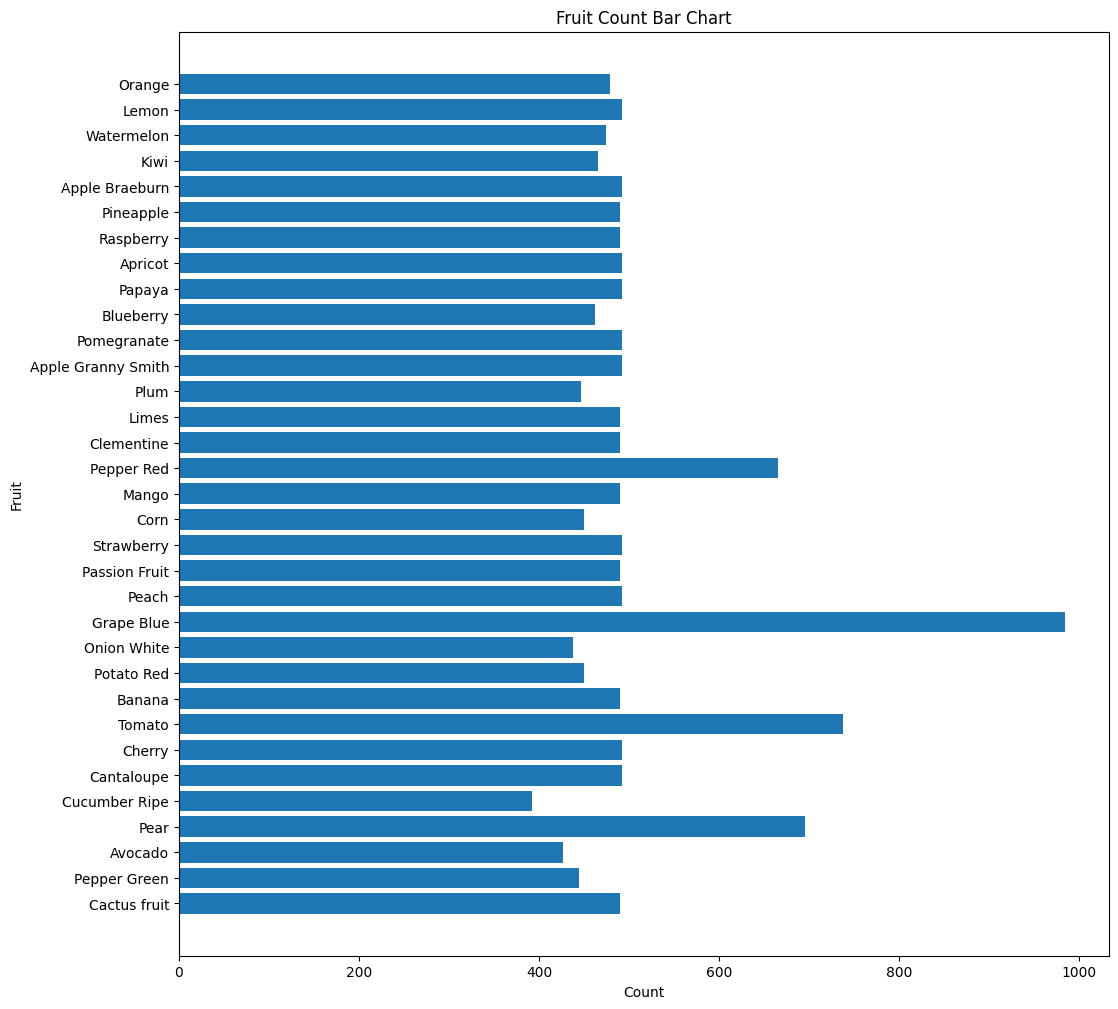

In [ ]:
fruits_count = dict()
for fruit in fruit_categories:
    fruit_path = os.path.join(dataset, fruit)
    fruits_count[fruit] = len(os.listdir(fruit_path))
fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(list(fruits_count.keys()), list(fruits_count.values()))
ax.set_xlabel('Count')

ax.set_ylabel('Fruit')
ax.set_title('Fruit Count Bar Chart')

# Creating a test set from the given dataset

In [ ]:
fruits_set = dict(
    {
        'Image': [],
        'Fruit_Type': []
    }
)
for fruit in fruit_categories:
    fruit_path = os.path.join(dataset, fruit)
    for path in os.listdir(fruit_path):
        fruits_set['Image'].append(os.path.join(fruit_path, path))
        fruits_set['Fruit_Type'].append(fruit)
fruits_set = pd.DataFrame(fruits_set)
fruits_set

,Image,Fruit_Type
0,/content/archive/train/train/Cactus fruit/Cact...,Cactus fruit
1,/content/archive/train/train/Cactus fruit/Cact...,Cactus fruit
2,/content/archive/train/train/Cactus fruit/Cact...,Cactus fruit
3,/content/archive/train/train/Cactus fruit/Cact...,Cactus fruit
4,/content/archive/train/train/Cactus fruit/Cact...,Cactus fruit
...,...,...
16849,/content/archive/train/train/Orange/Orange_289...,Orange
16850,/content/archive/train/train/Orange/Orange_284...,Orange
16851,/content/archive/train/train/Orange/Orange_460...,Orange
16852,/content/archive/train/train/Orange/Orange_364...,Orange


In [ ]:
fruits_df, fruits_test_df = train_test_split(fruits_set, test_size=0.3, stratify = fruits_set['Fruit_Type'])

In [ ]:
fruits_df

,Image,Fruit_Type
224,/content/archive/train/train/Cactus fruit/Cact...,Cactus fruit
11336,/content/archive/train/train/Apple Granny Smit...,Apple Granny Smith
9008,/content/archive/train/train/Pepper Red/Pepper...,Pepper Red
8439,/content/archive/train/train/Corn/Corn_390.jpg,Corn
13367,/content/archive/train/train/Apricot/Apricot_1...,Apricot
...,...,...
13768,/content/archive/train/train/Raspberry/Raspber...,Raspberry
10563,/content/archive/train/train/Limes/Limes_99.jpg,Limes
13140,/content/archive/train/train/Apricot/Apricot_1...,Apricot
5710,/content/archive/train/train/Grape Blue/Grape ...,Grape Blue


In [ ]:
fruits_test_df

,Image,Fruit_Type
12086,/content/archive/train/train/Blueberry/Blueber...,Blueberry
10807,/content/archive/train/train/Plum/Plum_341.jpg,Plum
6557,/content/archive/train/train/Peach/Peach_314.jpg,Peach
14569,/content/archive/train/train/Apple Braeburn/Ap...,Apple Braeburn
2788,/content/archive/train/train/Cantaloupe/Cantal...,Cantaloupe
...,...,...
4770,/content/archive/train/train/Potato Red/Potato...,Potato Red
12894,/content/archive/train/train/Papaya/Papaya_223...,Papaya
2932,/content/archive/train/train/Cantaloupe/Cantal...,Cantaloupe
6440,/content/archive/train/train/Grape Blue/Grape ...,Grape Blue


# Data Preprocessing

### Encoding Categorical Values

In [ ]:
pre_process_df = fruits_df.copy()
fruit_types_index_values = dict()
count = 1
for fruit in fruit_categories:
    fruit_types_index_values[fruit] = count
    count += 1
fruit_types_index_values

{'Cactus fruit': 1,
 'Pepper Green': 2,
 'Avocado': 3,
 'Pear': 4,
 'Cucumber Ripe': 5,
 'Cantaloupe': 6,
 'Cherry': 7,
 'Tomato': 8,
 'Banana': 9,
 'Potato Red': 10,
 'Onion White': 11,
 'Grape Blue': 12,
 'Peach': 13,
 'Passion Fruit': 14,
 'Strawberry': 15,
 'Corn': 16,
 'Mango': 17,
 'Pepper Red': 18,
 'Clementine': 19,
 'Limes': 20,
 'Plum': 21,
 'Apple Granny Smith': 22,
 'Pomegranate': 23,
 'Blueberry': 24,
 'Papaya': 25,
 'Apricot': 26,
 'Raspberry': 27,
 'Pineapple': 28,
 'Apple Braeburn': 29,
 'Kiwi': 30,
 'Watermelon': 31,
 'Lemon': 32,
 'Orange': 33}

In [ ]:
pre_process_df['Fruit_Index'] = pre_process_df['Fruit_Type'].map(fruit_types_index_values)
pre_process_df

,Image,Fruit_Type,Fruit_Index
224,/content/archive/train/train/Cactus fruit/Cact...,Cactus fruit,1
11336,/content/archive/train/train/Apple Granny Smit...,Apple Granny Smith,22
9008,/content/archive/train/train/Pepper Red/Pepper...,Pepper Red,18
8439,/content/archive/train/train/Corn/Corn_390.jpg,Corn,16
13367,/content/archive/train/train/Apricot/Apricot_1...,Apricot,26
...,...,...,...
13768,/content/archive/train/train/Raspberry/Raspber...,Raspberry,27
10563,/content/archive/train/train/Limes/Limes_99.jpg,Limes,20
13140,/content/archive/train/train/Apricot/Apricot_1...,Apricot,26
5710,/content/archive/train/train/Grape Blue/Grape ...,Grape Blue,12


In [ ]:
keras.utils.to_categorical(pre_process_df['Fruit_Index'])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Scaling image

In [ ]:
sample_image = pre_process_df['Image'][0]
print(sample_image)
img = cv2.imread(sample_image)
print('\nOriginal Image : \n', img)
img = img/255
print('\nRe-scaled Image : \n', img)

/content/archive/train/train/Cactus fruit/Cactus fruit_281.jpg

Original Image : 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]

Re-scaled Image : 
 [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [

### Creating a Pipeline for automating the pre-processing on the dataset

In [ ]:
class FruitPipeline:

    def __init__(self):
        self.fruit_types_index_values = dict()

    def fit(self, dataset):
        fruit_types = dataset['Fruit_Type'].unique()
        count = 0
        for fruit in fruit_types:
            self.fruit_types_index_values[fruit] = count
            count += 1

    def encode_categorical(self, dataset):
        dataset['Fruit_Index'] = dataset['Fruit_Type'].map(self.fruit_types_index_values)
        return keras.utils.to_categorical(dataset['Fruit_Index'])

    def scale_dataset(self, dataset):
        X = []
        for image in dataset['Image']:
            img = cv2.imread(image)
            scaled_img = img/255
            X.append(scaled_img)
        return np.array(X)

    def transform(self, dataset):
        Y = self.encode_categorical(dataset.copy())
        X = self.scale_dataset(dataset.copy())
        return X, Y

In [ ]:
fruit_pipeline = FruitPipeline()
fruit_pipeline.fit(fruits_df)

## Preparing training, validation and testing set

#### Splitting dataset into training and validation using stratified split to preserve class ratios in training and validation set

In [ ]:
training_df, validation_df = train_test_split(fruits_df, test_size=0.2, stratify = fruits_df['Fruit_Type'])

### Training Set

In [ ]:
training_df

,Image,Fruit_Type
15300,/content/archive/train/train/Kiwi/Kiwi_407.jpg,Kiwi
15433,/content/archive/train/train/Watermelon/Waterm...,Watermelon
3543,/content/archive/train/train/Tomato/Tomato_601...,Tomato
3438,/content/archive/train/train/Tomato/Tomato_365...,Tomato
3338,/content/archive/train/train/Cherry/Cherry_321...,Cherry
...,...,...
7627,/content/archive/train/train/Strawberry/Strawb...,Strawberry
12325,/content/archive/train/train/Blueberry/Blueber...,Blueberry
16262,/content/archive/train/train/Lemon/Lemon_432.jpg,Lemon
4980,/content/archive/train/train/Potato Red/Potato...,Potato Red


In [ ]:
X_train, Y_train = fruit_pipeline.transform(training_df)

In [ ]:
X_train

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [ ]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Validation Set

In [ ]:
validation_df

,Image,Fruit_Type
9277,/content/archive/train/train/Pepper Red/Pepper...,Pepper Red
16256,/content/archive/train/train/Lemon/Lemon_487.jpg,Lemon
6067,/content/archive/train/train/Grape Blue/Grape ...,Grape Blue
6125,/content/archive/train/train/Grape Blue/Grape ...,Grape Blue
7244,/content/archive/train/train/Passion Fruit/Pas...,Passion Fruit
...,...,...
5761,/content/archive/train/train/Grape Blue/Grape ...,Grape Blue
3219,/content/archive/train/train/Cherry/Cherry_480...,Cherry
14960,/content/archive/train/train/Kiwi/Kiwi_209.jpg,Kiwi
9179,/content/archive/train/train/Pepper Red/Pepper...,Pepper Red


In [ ]:
X_validation , Y_validation = fruit_pipeline.transform(validation_df)

In [ ]:
X_validation

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [ ]:
Y_validation

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Testing Set

In [ ]:
fruits_test_df

,Image,Fruit_Type
12086,/content/archive/train/train/Blueberry/Blueber...,Blueberry
10807,/content/archive/train/train/Plum/Plum_341.jpg,Plum
6557,/content/archive/train/train/Peach/Peach_314.jpg,Peach
14569,/content/archive/train/train/Apple Braeburn/Ap...,Apple Braeburn
2788,/content/archive/train/train/Cantaloupe/Cantal...,Cantaloupe
...,...,...
4770,/content/archive/train/train/Potato Red/Potato...,Potato Red
12894,/content/archive/train/train/Papaya/Papaya_223...,Papaya
2932,/content/archive/train/train/Cantaloupe/Cantal...,Cantaloupe
6440,/content/archive/train/train/Grape Blue/Grape ...,Grape Blue


In [ ]:
X_test, Y_test = fruit_pipeline.transform(fruits_test_df)

In [ ]:
X_test

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [ ]:
Y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Model Selection

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 7, kernel_size = 4, activation = 'relu', input_shape = (100, 100, 3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(90, activation='relu'))
model.add(tf.keras.layers.Dense(40, activation='relu'))
model.add(tf.keras.layers.Dense(len(fruit_categories), activation='softmax'))

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 97, 97, 7)         343       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 7)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16128)             0         
                                                                 
 dense (Dense)               (None, 100)               1612900   
                                                                 
 dense_1 (Dense)             (None, 90)                9090      
                                                                 
 dense_2 (Dense)             (None, 40)                3640      
                                                        

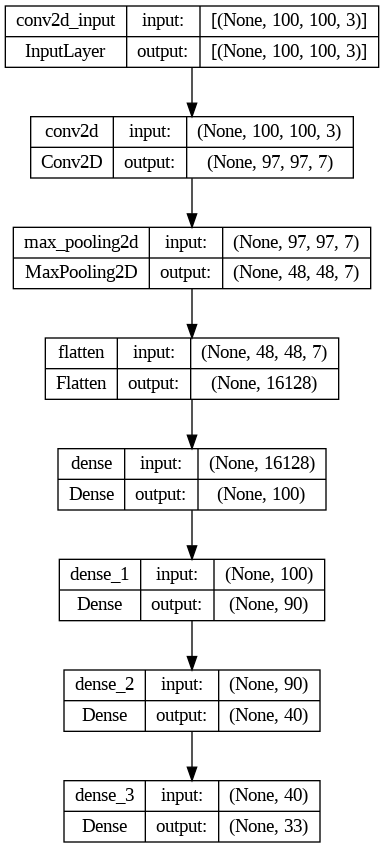

In [ ]:
keras.utils.plot_model(model, "model_architecture.png", show_shapes=True)

In [ ]:
model.compile(loss="categorical_crossentropy",
               optimizer = 'sgd',
               metrics = ['accuracy'])

In [ ]:
len(X_train)

9437

# Training the Model

In [ ]:
model_history = model.fit(X_train, Y_train,
                       epochs = 10, validation_data=(X_validation, Y_validation), batch_size=128)

Epoch 1/10
74/74 [==============================] - 48s 638ms/step - loss: 3.2029 - accuracy: 0.1673 - val_loss: 2.7268 - val_accuracy: 0.2119
Epoch 2/10
74/74 [==============================] - 50s 675ms/step - loss: 2.4126 - accuracy: 0.3116 - val_loss: 1.7887 - val_accuracy: 0.5144
Epoch 3/10
74/74 [==============================] - 48s 656ms/step - loss: 1.4426 - accuracy: 0.5983 - val_loss: 1.0291 - val_accuracy: 0.7025
Epoch 4/10
74/74 [==============================] - 47s 638ms/step - loss: 0.7637 - accuracy: 0.7778 - val_loss: 0.4199 - val_accuracy: 0.8733
Epoch 5/10
74/74 [==============================] - 50s 676ms/step - loss: 0.5066 - accuracy: 0.8558 - val_loss: 0.3674 - val_accuracy: 0.8831
Epoch 6/10
74/74 [==============================] - 49s 662ms/step - loss: 0.2365 - accuracy: 0.9378 - val_loss: 0.2058 - val_accuracy: 0.9453
Epoch 7/10
74/74 [==============================] - 49s 664ms/step - loss: 0.4179 - accuracy: 0.8897 - val_loss: 0.1425 - val_accuracy: 0.9686

<Axes: >

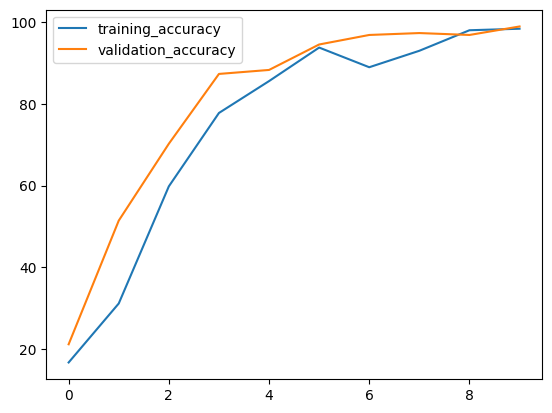

In [ ]:
accuracy_curve = dict({'training_accuracy':[], 'validation_accuracy':[]})
for accuracy in model_history.history['accuracy']:
  accuracy_curve['training_accuracy'].append(accuracy * 100)
for accuracy in model_history.history['val_accuracy']:
  accuracy_curve['validation_accuracy'].append(accuracy * 100)
pd.DataFrame(accuracy_curve).plot()

<Axes: >

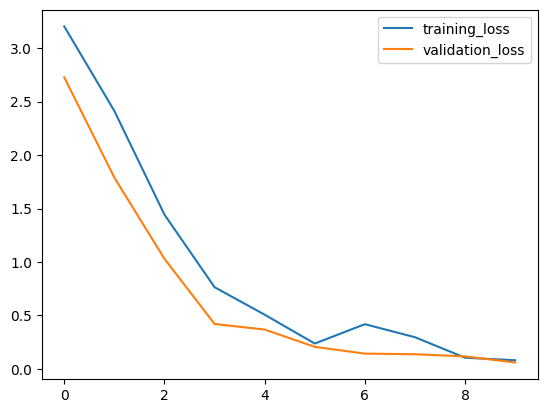

In [ ]:
loss_curve = dict()
loss_curve['training_loss'] = model_history.history['loss']
loss_curve['validation_loss'] = model_history.history['val_loss']
pd.DataFrame(loss_curve).plot()

# Evaluating the Results on the Test Set

### Accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy : ', accuracy * 100)

159/159 [==============================] - 9s 57ms/step - loss: 0.0702 - accuracy: 0.9858
Accuracy :  98.57622981071472


### Confusion Matrix

In [ ]:
Y_pred = model.predict(X_test)

159/159 [==============================] - 9s 56ms/step


In [ ]:
Y_pred = tf.argmax(Y_pred, axis=1)

In [ ]:
Y_test = tf.argmax(Y_test, axis=1)

In [ ]:
fruits_test_df_confusion_matrix = confusion_matrix(Y_test, Y_pred)
fruits_test_df_confusion_matrix

array([[123,   0,   0, ...,   0,   0,   8],
       [  0, 148,   0, ...,   0,   0,   0],
       [  0,   0, 200, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 147,   0,   0],
       [  0,   0,   0, ...,   0, 138,   0],
       [  0,   0,   0, ...,   0,   0, 146]])

<Axes: >

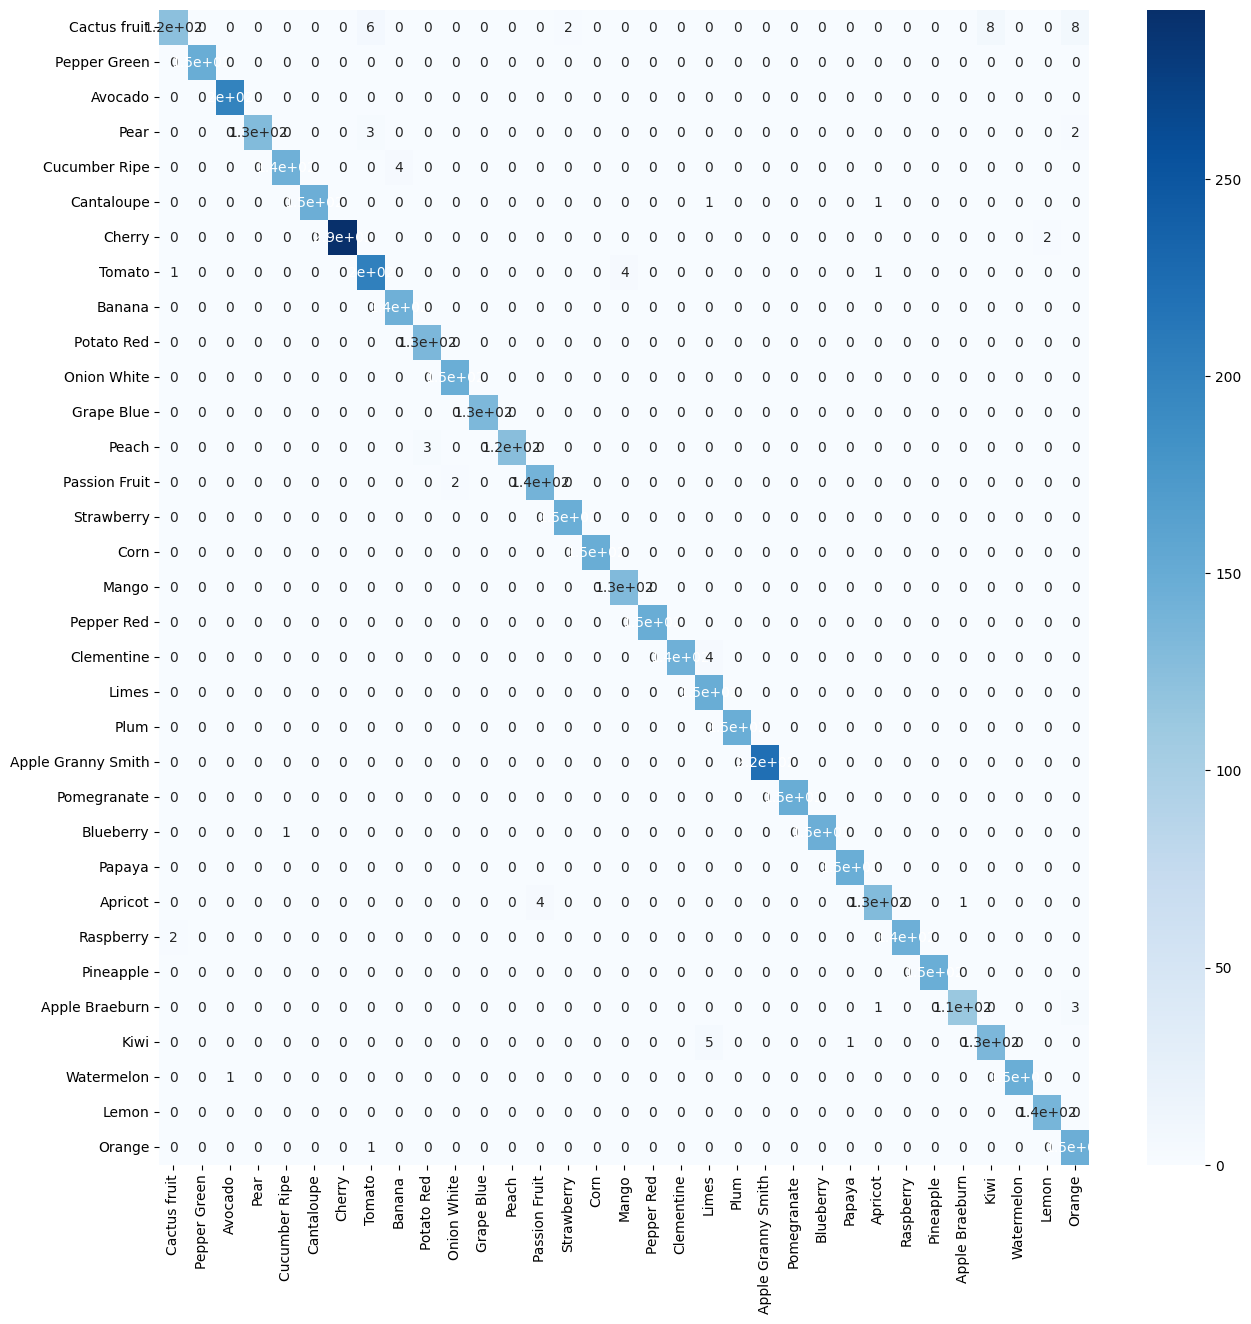

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(pd.DataFrame(fruits_test_df_confusion_matrix, index= fruit_categories, columns = fruit_categories), annot = True, cmap="Blues")